*Updated*: 05-19-2021

**TO AVOID CONFLICT AMONG USERS MAKE A COPY OF THIS NOTEBOOK IN YOUR OWN FOLDER**

# Querying rMATS Splicing Events

Notebook's purpose: provide an intuitive interface for exploring rMATS splicing event output.

## Requirements:
- rMATS JC.txt and/or JCEC.txt output
- rMATS output from each experiment should be in its own folder. 
  - e.g. WT +LPS vs. KO +LPS output is in a folder called LPS
- All experiment folders should be in a single folder to which you have access on YOUR personal GDrive. 
  - If the data is in your folder in the Carpenter Lab shared drive, simply add a shortcut from that data folder to your personal drive.

## Usage
Run the first three notebook cells in order by clicking the "play" button in the top left corner
  1. The first cell will make you mount your personal drive and has a security step (as far as I can tell this will happen everytime you initialize the notebook, which is annoying).
  2. In the second cell, input the path to your data 
    - It should start with "/content/drive/MyDrive/"
    - It should end with "/"
    - Example: "/content/drive/MyDrive/Eric Malekos/rMATsOutput/"
    - After running this cell, the dropdown menu should populate with experiment folders
      - If the folders are incorrect check your **Data_Directory** path and try again.
      - You can look at the directory tree structure in the panel to the left of the notebook to navigate to the correct location.
  3. The third cell performs preprocessing on the data. **If you change the experiment in the dropdown rerun cell 3**

email emalekos@ucsc.edu or DM me on slack if you encounter problems or have suggestions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title (1) Mount Drive and Load Libraries

from google.colab import drive
drive.mount('/content/drive/')
import glob
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv        
import matplotlib.pyplot as plt
import matplotlib.ticker 

trans_dict = { 'A3SS' : 'Alternative 3\' Splice Site selection',
                'A5SS' : 'Alternative 5\' Splice Site selection',
                'MXE' : 'Mutually Exclusive Exon',
                'RI' : 'Retained Intron',
                'SE' : 'Skipped Exon'
  }

  #/content/drive/MyDrive/Colab_Notebooks/rMATsOutput/
  #/content/drive/MyDrive/Eric Malekos/RNA_SEQ_ANALYSIS/Splicing Analysis/Splicing Events/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#@title (2) Set Data Directory



Data_Directory = '/content/drive/MyDrive/BME 237/CTL/rMATS/' #@param {type:"string"}

subdirs = glob.glob(Data_Directory + "*")


subdirs = [s for s in subdirs if "." not in s]

subdirs = [dir.split("/")[-1] for dir in subdirs]

experiment_folder = widgets.Dropdown(
    options=subdirs,
    value=subdirs[0],
    description='Experiment:',
)
display(experiment_folder)
#print("Current Experiment Folder: ", experiment_folder.value)

Dropdown(description='Experiment:', options=('CTL_rMATS_output',), value='CTL_rMATS_output')

In [ ]:
#@title (3) Preprocess Data

trans_dict = { 'A3SS_JC' : 'Alternative 3\' Splice Site selection from Junction Count',
              'A3SS_JCEC' : 'Alternative 3\' Splice Site selection from Junction and Exon Count',
              'A5SS_JC' : 'Alternative 5\' Splice Site selection from Junction Count',
              'A5SS_JCEC' : 'Alternative 5\' Splice Site selection from Junction Count and Exon Count',
              'MXE_JC' : 'Mutually Exclusive Exon from Junction Count',
              'MXE_JCEC' : 'Mutually Exclusive Exon from Junction Count and Exon Count',
              'RI_JC' : 'Retained Intron from Junction Count',
              'RI_JCEC' : 'Retained Intron from Junction Count and Exon Count',
              'SE_JC' : 'Skipped Exon from Junction Count',
              'SE_JCEC' : 'Skipped Exon from Junction Count and Exon Count'
              }
map_dict = { 'A3SS' : ['A3SS_JC', 'A3SS_JCEC' ],
                'A5SS' : ['A5SS_JC', 'A5SS_JCEC'],
                'MXE' : ['MXE_JC', 'MXE_JCEC'],
                'RI' : ['RI_JC', 'RI_JCEC'],
                'SE' : ['SE_JC', 'SE_JCEC']
               } 

def sumReadCounts(entry, sep=","):
  return sum([int(e) for e in entry.split(sep)])


data_files = sorted(glob.glob(Data_Directory + experiment_folder.value + '/*.MATS.*.txt'))

def preprocess(FDR, pValue, inclevel, readSupport):
  for d_f in data_files:
    name = d_f.split('/')[-1]
    print("Processing: ", name)
    df = pd.read_csv(d_f, sep='\t', header=0).sort_values(by='FDR')
    print("Number of event entries before processing: ", df.shape[0])
    df = df[(df.FDR <= FDR) & (df.PValue <= pValue) & (abs(df.IncLevelDifference) >= inclevel)]
    df[df.IJC_SAMPLE_1.apply(sumReadCounts) + df.IJC_SAMPLE_2.apply(sumReadCounts) + 
    df.SJC_SAMPLE_1.apply(sumReadCounts) + df.SJC_SAMPLE_2.apply(sumReadCounts)>= readSupport]
    print("Number of event entries after processing: ", df.shape[0])
    print()

    dict_name =  name.replace(".MATS.", "_")[:-4]

    data_dict[dict_name] = df

FDR_Cutoff =  0.25#@param {type:"number"}

pValue_Cutoff =  1#@param {type:"number"} 

Inclusion_Level_Cutoff =  0.1#@param {type:"number"} 

Minimum_Read_Support =  10#@param {type:"number"} 


data_dict = {}

preprocess(FDR = FDR_Cutoff, pValue = pValue_Cutoff, 
           inclevel = Inclusion_Level_Cutoff, readSupport = Minimum_Read_Support)


Processing:  A3SS.MATS.JC.txt
Number of event entries before processing:  6801
Number of event entries after processing:  74

Processing:  A3SS.MATS.JCEC.txt
Number of event entries before processing:  6809
Number of event entries after processing:  87

Processing:  A5SS.MATS.JC.txt
Number of event entries before processing:  5959
Number of event entries after processing:  56

Processing:  A5SS.MATS.JCEC.txt
Number of event entries before processing:  5964
Number of event entries after processing:  74

Processing:  MXE.MATS.JC.txt
Number of event entries before processing:  2316
Number of event entries after processing:  32

Processing:  MXE.MATS.JCEC.txt
Number of event entries before processing:  2412
Number of event entries after processing:  28

Processing:  RI (1).MATS.JCEC.txt
Number of event entries before processing:  3887
Number of event entries after processing:  320

Processing:  RI.MATS.JC.txt
Number of event entries before processing:  3848
Number of event entries after pr

In [ ]:
#@title Top Hits (sorted by FDR)

def top_hit_search(search_list, top_hits):
  listout = []
  for entry in search_list:
    top = data_dict[entry].head(top_hits)
    
    title = trans_dict[entry]
    print("\n\n" + title + " Events\n")
    display(top[['ID', 'GeneID', 'geneSymbol', 'PValue', 'FDR', 'chr', 'strand']])
    
    listout.append("#\t" + title)
    listout.append("#")
    top_str = top.to_string()
    top_list = top_str.split("\n")
    clean_list = []
    title = True
    for line in top_list:
      if title:
        line = "Index" + line
        title = False
      cur = line.split(" ")
      temp = []
      for e in cur:
        if e != "":
          temp.append(e)
      clean_list.append("\t".join(temp))

    listout.append("\n".join(clean_list))
    listout.append("#")
  return "\n".join(listout)


Top_Hits =  1000#@param {type:"integer"}

A3SS = True #@param {type:"boolean"}
A5SS = True #@param {type:"boolean"}
MXE = True #@param {type:"boolean"}
RI = True #@param {type:"boolean"}
SE = True #@param {type:"boolean"}

# search_dict = { 'A3SS' : A3SS,
#                 'A5SS' : A5SS,
#                 'MXE' : MXE,
#                 'RI' : RI,
#                 'SE' : SE
#   } 
filter = [A3SS, A5SS, MXE, RI, SE] 
filtered_list = [map_dict[i] for (i, v) in zip(map_dict.keys(), filter) if v]

flat_f_list = [v for f_l in filtered_list for v in f_l]

tophits = top_hit_search(search_list=flat_f_list, top_hits=Top_Hits)




Alternative 3' Splice Site selection from Junction Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
4266,9622,XLOC_006155,NaN,3.515392e-09,0.000024,chr11,+
2097,4728,XLOC_008582,NaN,1.244175e-07,0.000423,chr12,+
1586,3580,XLOC_042418,NaN,2.501166e-07,0.000567,chr9,+
6512,14732,XLOC_027897,NaN,5.795520e-07,0.000985,chr4,+
4407,9946,XLOC_032219,NaN,7.422378e-07,0.001010,chr5,-
...,...,...,...,...,...,...,...
561,1225,XLOC_038740,NaN,3.559372e-03,0.226236,chr7,-
266,600,XLOC_042094,NaN,3.691955e-03,0.229665,chr9,+
3588,8076,XLOC_003683,NaN,3.829925e-03,0.232565,chr10,+
2058,4650,XLOC_033382,NaN,4.023979e-03,0.242187,chr6,+




Alternative 3' Splice Site selection from Junction and Exon Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
4270,9622,XLOC_006155,NaN,3.515392e-09,0.000024,chr11,+
2099,4728,XLOC_008582,NaN,1.244175e-07,0.000346,chr12,+
1587,3580,XLOC_042418,NaN,2.501166e-07,0.000346,chr9,+
536,1153,XLOC_039313,NaN,2.542848e-07,0.000346,chr7,-
6520,14732,XLOC_027897,NaN,5.795520e-07,0.000658,chr4,+
...,...,...,...,...,...,...,...
2407,5372,XLOC_026044,NaN,4.527534e-03,0.231789,chr3,-
4933,11180,XLOC_029162,NaN,4.720565e-03,0.235111,chr4,-
5618,12716,XLOC_021495,NaN,4.696124e-03,0.235111,chr2,+
3097,6935,XLOC_005811,NaN,4.689159e-03,0.235111,chr11,+




Alternative 5' Splice Site selection from Junction Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
5001,10571,XLOC_019415,NaN,0.000004,0.011881,chr17,-
5548,11766,XLOC_026227,NaN,0.000007,0.013818,chr3,-
447,983,XLOC_039329,NaN,0.000017,0.014832,chr7,-
4799,10146,XLOC_007162,NaN,0.000010,0.014832,chr11,-
3060,6375,XLOC_013919,NaN,0.000017,0.014832,chr14,-
5346,11297,XLOC_024092,NaN,0.000026,0.019122,chr2,-
3061,6376,XLOC_013919,NaN,0.000031,0.020774,chr14,-
3999,8441,XLOC_015493,NaN,0.000040,0.022470,chr15,+
4160,8742,XLOC_016205,NaN,0.000041,0.022470,chr15,-
821,1729,XLOC_034813,NaN,0.000046,0.022981,chr6,-




Alternative 5' Splice Site selection from Junction Count and Exon Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
5553,11766,XLOC_026227,NaN,0.000005,0.007743,chr3,-
3062,6375,XLOC_013919,NaN,0.000017,0.011545,chr14,-
447,983,XLOC_039329,NaN,0.000017,0.011545,chr7,-
4804,10146,XLOC_007162,NaN,0.000010,0.011545,chr11,-
5351,11297,XLOC_024092,NaN,0.000026,0.013919,chr2,-
...,...,...,...,...,...,...,...
128,298,XLOC_043937,NaN,0.004256,0.238482,chr9,-
712,1496,XLOC_036412,NaN,0.004517,0.242672,chr7,+
3816,8031,XLOC_019079,NaN,0.004567,0.242698,chr17,-
3347,7018,XLOC_007912,NaN,0.004647,0.243116,chr11,-




Mutually Exclusive Exon from Junction Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
1377,1820,XLOC_005844,NaN,1.051348e-11,2.434922e-08,chr11,+
969,1271,XLOC_033911,NaN,4.579241e-06,5.302761e-03,chr6,+
713,923,XLOC_020580,NaN,7.190549e-06,5.551104e-03,chr19,+
1636,2135,XLOC_017084,NaN,1.002087e-05,5.802084e-03,chr16,+
337,448,XLOC_033701,NaN,5.898814e-05,2.276942e-02,chr6,+
1562,2045,XLOC_015961,NaN,1.764623e-04,5.838382e-02,chr15,-
1054,1383,XLOC_000400,NaN,2.536924e-04,7.344395e-02,chr1,+
1793,2342,XLOC_029361,NaN,3.262644e-04,7.556284e-02,chr4,-
1367,1807,XLOC_005703,NaN,3.098358e-04,7.556284e-02,chr11,+
1911,2493,XLOC_003938,NaN,5.563867e-04,1.171447e-01,chr10,+




Mutually Exclusive Exon from Junction Count and Exon Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
783,981,XLOC_017867,NaN,9.992007e-16,2.410072e-12,chr17,+
1438,1820,XLOC_005844,NaN,4.255818e-12,5.132516e-09,chr11,+
1985,2487,XLOC_007046,NaN,1.833534e-08,1.474161e-05,chr11,-
1986,2488,XLOC_007046,NaN,9.939164e-08,5.993316e-05,chr11,-
741,923,XLOC_020580,NaN,7.309016e-06,2.754391e-03,chr19,+
1523,1917,XLOC_032219,NaN,3.049421e-05,8.172448e-03,chr5,-
1624,2042,XLOC_015961,NaN,7.612114e-05,1.836042e-02,chr15,-
1627,2045,XLOC_015961,NaN,1.271624e-04,2.498218e-02,chr15,-
196,246,XLOC_039882,NaN,1.346469e-04,2.498218e-02,chr8,+
1420,1799,XLOC_011419,NaN,2.005573e-04,3.455315e-02,chr13,-




Retained Intron from Junction Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
3138,7244,XLOC_020757,NaN,1.390263e-08,0.000007,chr19,-
1285,2941,XLOC_035019,NaN,1.344484e-08,0.000007,chr6,-
1286,2942,XLOC_035019,NaN,8.848039e-09,0.000007,chr6,-
1287,2943,XLOC_035019,NaN,1.413539e-08,0.000007,chr6,-
2203,5120,XLOC_032454,NaN,1.124878e-08,0.000007,chr5,-
...,...,...,...,...,...,...,...
3173,7338,XLOC_021132,NaN,3.812217e-02,0.244794,chr19,-
2059,4786,XLOC_005276,NaN,3.914911e-02,0.246960,chr10,-
496,1165,XLOC_036244,NaN,3.897608e-02,0.246960,chr7,+
87,205,XLOC_043710,NaN,3.962213e-02,0.249127,chr9,-




Retained Intron from Junction Count and Exon Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
4,1966,XLOC_023159,NaN,6.044054e-13,4.698648e-10,chr2,-
5,1074,XLOC_037149,NaN,1.651679e-12,9.894218e-10,chr7,+
8,2942,XLOC_035019,NaN,3.689826e-12,1.593595e-09,chr6,-
13,2943,XLOC_035019,NaN,1.318372e-10,3.660366e-08,chr6,-
14,1076,XLOC_037149,NaN,1.687882e-10,4.373865e-08,chr7,+
...,...,...,...,...,...,...,...
1094,1405,XLOC_034261,NaN,6.749344e-02,2.395863e-01,chr6,-
1095,4638,XLOC_039875,NaN,6.776300e-02,2.403237e-01,chr8,+
1100,3389,XLOC_000729,NaN,6.912810e-02,2.434228e-01,chr1,+
1103,8348,XLOC_026552,NaN,6.904929e-02,2.434228e-01,chr3,-




Skipped Exon from Junction Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
4625,8213,XLOC_016817,NaN,4.737107e-08,0.000766,chr16,+
4731,8391,XLOC_007840,NaN,7.051533e-08,0.000766,chr11,-
8372,14493,XLOC_041714,NaN,2.426440e-07,0.001756,chr8,-
6046,10568,XLOC_010563,NaN,9.120225e-07,0.004950,chr13,+
6405,11209,XLOC_011561,NaN,1.530270e-06,0.006645,chr13,-
...,...,...,...,...,...,...,...
5648,9913,XLOC_041000,NaN,1.529409e-03,0.233849,chr8,-
2536,4622,XLOC_036091,NaN,1.522382e-03,0.233849,chr7,+
4507,7978,XLOC_007296,NaN,1.557458e-03,0.236472,chr11,-
2750,5013,XLOC_043781,NaN,1.660651e-03,0.246959,chr9,-




Skipped Exon from Junction Count and Exon Count Events



,ID,GeneID,geneSymbol,PValue,FDR,chr,strand
15812,26577,XLOC_017410,NaN,9.758860e-13,2.154073e-08,chr16,-
6514,11206,XLOC_011561,NaN,1.328259e-08,1.465934e-04,chr13,-
4706,8213,XLOC_016817,NaN,4.737107e-08,3.485406e-04,chr16,+
4815,8391,XLOC_007840,NaN,7.051533e-08,3.891212e-04,chr11,-
8524,14493,XLOC_041714,NaN,2.034891e-07,8.983230e-04,chr8,-
...,...,...,...,...,...,...,...
10835,18327,XLOC_023172,NaN,2.581580e-03,2.364449e-01,chr2,-
7575,12875,XLOC_027383,NaN,2.676613e-03,2.441359e-01,chr4,+
14173,23807,XLOC_011511,NaN,2.699199e-03,2.451828e-01,chr13,-
9888,16725,XLOC_000649,NaN,2.731672e-03,2.453938e-01,chr1,+


In [ ]:
#@title Save Results - saves output from Top Hits search above to file name specified
File_Name = 'ctl_rmats_Results_padj_25.txt' #@param {type:"string"}

button = widgets.Button(description="Save Output")
output = widgets.Output()

display(button, output)
#print(tophits)
def on_button_clicked(b):
    with output:
      with open(Data_Directory+File_Name, mode="w+") as f:
        f.write(tophits)

    print(File_Name + " saved in " + Data_Directory)



button.on_click(on_button_clicked)

Button(description='Save Output', style=ButtonStyle())

Output()

ctl_rmats_Results_padj_25.txt saved in /content/drive/MyDrive/BME 237/CTL/rMATS/


In [ ]:
#@title Gene Search by Symbol


def gene_search(experiment, gene, FDR = 0.05, pvalue = 0.05):
  print(gene)
  for key, df in data_dict.items():
    gene_df = df[(df.geneSymbol == gene) & (df.FDR <= FDR) & (df.PValue <= pvalue)]
    print("\n\n" + trans_dict[key] + " Events\n")
    if gene_df.shape[0] > 0:
      display(gene_df)

GeneSymbol = 'Samhd1' #@param {type:"string"}

FDR = 0.1 #@param {type:"number"}

pValue =  0.1#@param {type:"number"}

gene_search(experiment_folder.value, GeneSymbol, FDR=FDR, pvalue=pValue)

Samhd1


Alternative 3' Splice Site selection from Junction Count Events



Alternative 3' Splice Site selection from Junction and Exon Count Events



Alternative 5' Splice Site selection from Junction Count Events



Alternative 5' Splice Site selection from Junction Count and Exon Count Events



Mutually Exclusive Exon from Junction Count Events



Mutually Exclusive Exon from Junction Count and Exon Count Events



Retained Intron from Junction Count Events



Retained Intron from Junction Count and Exon Count Events



Skipped Exon from Junction Count Events



,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
0,31605,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101443,157099400,157099503,157101720,157101858,31605,"894,1203,1522","1364,1613,2068",343678497,"1246,2387,1429",273,150,0.0,0.0,"0.265,0.291,0.288","0.131,0.135,0.16",0.139
2,74135,ENSMUSG00000027639.16,Samhd1,chr2,-,157101316,157101443,157099400,157099503,157101720,157101858,74135,481654801,"1364,1613,2068",189350261,"1246,2387,1429",277,150,0.0,0.0,"0.16,0.18,0.173","0.076,0.074,0.09",0.091
3,74136,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101396,157099400,157099503,157101720,157101858,74136,197256291,"1364,1613,2068","66,136,94","1246,2387,1429",226,150,0.0,0.0,"0.087,0.095,0.085","0.034,0.036,0.042",0.052




Skipped Exon from Junction Count and Exon Count Events



,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
61222,74136,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101396,157099400,157099503,157101720,157101858,74136,"197,256,291","1364,1613,2068","66,136,94","1246,2387,1429",226,150,0.0,0.0,"0.087,0.095,0.085","0.034,0.036,0.042",0.052
23697,31605,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101443,157099400,157099503,157101720,157101858,31605,"894,1203,1522","1364,1613,2068","343,678,497","1246,2387,1429",273,150,0.0,0.0,"0.265,0.291,0.288","0.131,0.135,0.16",0.139
61221,74135,ENSMUSG00000027639.16,Samhd1,chr2,-,157101316,157101443,157099400,157099503,157101720,157101858,74135,"481,654,801","1364,1613,2068","189,350,261","1246,2387,1429",277,150,0.0,0.0,"0.16,0.18,0.173","0.076,0.074,0.09",0.091


In [ ]:
#@title Gene Search by GeneID
def gene_search_ID(experiment, geneid, FDR = 0.05, pvalue = 0.05):
  print(str(geneid))
  for key, df in data_dict.items():
    gene_df = df[(df.GeneID == geneid) & (df.FDR <= FDR) & (df.PValue <= pvalue)]
    print("\n\n" + trans_dict[key] + " Events\n")
    if gene_df.shape[0] > 0:
      display(gene_df)

GeneID = 'ENSMUSG00000027639.16' #@param {type:"string"}

FDR = 0.05 #@param {type:"number"}

pValue =  0.05#@param {type:"number"}

gene_search_ID(experiment_folder.value, GeneID, FDR=FDR, pvalue=pValue)

ENSMUSG00000027639.16


Alternative 3' Splice Site selection from Junction Count Events



Alternative 3' Splice Site selection from Junction and Exon Count Events



Alternative 5' Splice Site selection from Junction Count Events



Alternative 5' Splice Site selection from Junction Count and Exon Count Events



Mutually Exclusive Exon from Junction Count Events



Mutually Exclusive Exon from Junction Count and Exon Count Events



Retained Intron from Junction Count Events



Retained Intron from Junction Count and Exon Count Events



Skipped Exon from Junction Count Events



,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
0,31605,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101443,157099400,157099503,157101720,157101858,31605,"894,1203,1522","1364,1613,2068",343678497,"1246,2387,1429",273,150,0.0,0.0,"0.265,0.291,0.288","0.131,0.135,0.16",0.139
2,74135,ENSMUSG00000027639.16,Samhd1,chr2,-,157101316,157101443,157099400,157099503,157101720,157101858,74135,481654801,"1364,1613,2068",189350261,"1246,2387,1429",277,150,0.0,0.0,"0.16,0.18,0.173","0.076,0.074,0.09",0.091
3,74136,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101396,157099400,157099503,157101720,157101858,74136,197256291,"1364,1613,2068","66,136,94","1246,2387,1429",226,150,0.0,0.0,"0.087,0.095,0.085","0.034,0.036,0.042",0.052




Skipped Exon from Junction Count and Exon Count Events



,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
61222,74136,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101396,157099400,157099503,157101720,157101858,74136,"197,256,291","1364,1613,2068","66,136,94","1246,2387,1429",226,150,0.0,0.0,"0.087,0.095,0.085","0.034,0.036,0.042",0.052
23697,31605,ENSMUSG00000027639.16,Samhd1,chr2,-,157101320,157101443,157099400,157099503,157101720,157101858,31605,"894,1203,1522","1364,1613,2068","343,678,497","1246,2387,1429",273,150,0.0,0.0,"0.265,0.291,0.288","0.131,0.135,0.16",0.139
61221,74135,ENSMUSG00000027639.16,Samhd1,chr2,-,157101316,157101443,157099400,157099503,157101720,157101858,74135,"481,654,801","1364,1613,2068","189,350,261","1246,2387,1429",277,150,0.0,0.0,"0.16,0.18,0.173","0.076,0.074,0.09",0.091


SE_JCEC


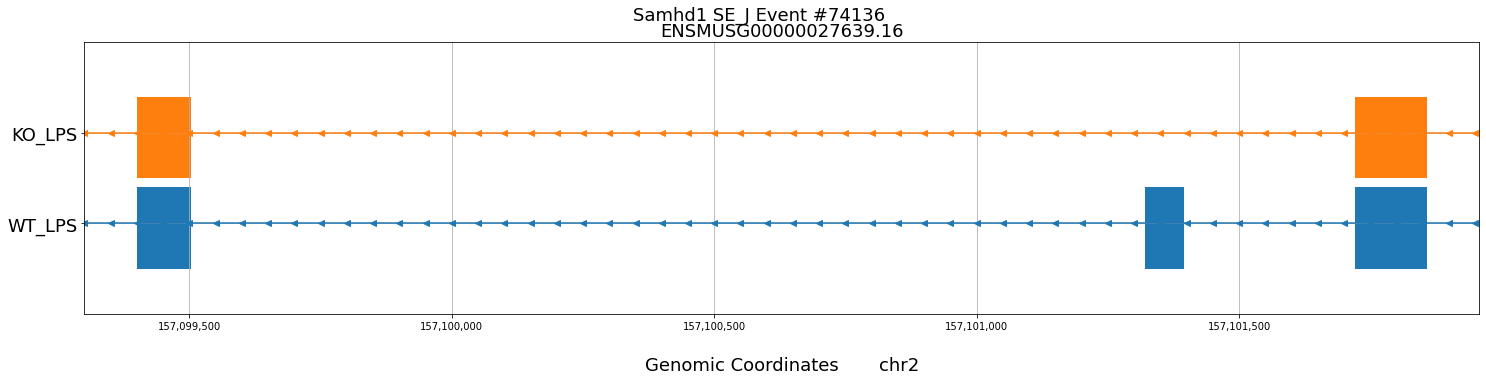


 Link to corresponding Ensembl gene annotation: 
http://nov2020.archive.ensembl.org/Mus_musculus/Location/View?db=core;g=ENSMUSG00000027639.16;r=2:157099300-157101958


In [ ]:
#@title 
# Need to look at this. ALT33 is wrong. should probably be its own conditional
def ensembl_link(entry, event):
  ndx = entry.index.tolist()[0]
  if not "SS_" in event:
    link = "http://nov2020.archive.ensembl.org/Mus_musculus/Location/View?db=core;g=" + entry.at[ndx, 'GeneID'] + \
  ";r=" + entry.at[ndx, 'chr'][3:] + ":" + str((entry.at[ndx, 'upstreamES'] - 100)) + "-" + str((entry.at[ndx, 'downstreamEE'] + 100))
  else:
    link = "http://nov2020.archive.ensembl.org/Mus_musculus/Location/View?db=core;g=" + entry.at[ndx, 'GeneID'] + \
  ";r=" + entry.at[ndx, 'chr'][3:] + ":" + str((entry.at[ndx, 'flankingEE'] - 100)) + "-" + str((entry.at[ndx, 'longExonStart_0base'] + 100))
  
	

  return link

def form_barh_tuples(entry, event):
  ndx = entry.index.tolist()[0]
  tuplist1 = None
  tuplist2 = None
  start = 0
  stop = 0
  if event == 'SE_JC' or event == 'SE_JCEC':
    tuplist1 = [(entry.at[ndx, 'upstreamES'], entry.at[ndx, 'upstreamEE']- entry.at[ndx, 'upstreamES'] ), 
                  (entry.at[ndx, 'exonStart_0base'], entry.at[ndx, 'exonEnd']- entry.at[ndx, 'exonStart_0base']),
                  (entry.at[ndx, 'downstreamES'], entry.at[ndx, 'downstreamEE']- entry.at[ndx, 'downstreamES'])]
    tuplist2 = [(entry.at[ndx, 'upstreamES'], entry.at[ndx, 'upstreamEE']- entry.at[ndx, 'upstreamES']),
                  (entry.at[ndx, 'downstreamES'], entry.at[ndx, 'downstreamEE']- entry.at[ndx, 'downstreamES'])]
    start = entry.at[ndx, 'upstreamES']
    stop = entry.at[ndx, 'downstreamEE']
  
  if event == 'RI_JC' or event == 'RI_JCEC':
    tuplist1 = [(entry.at[ndx, 'upstreamES'], entry.at[ndx, 'upstreamEE']- entry.at[ndx, 'upstreamES'] ), 
                  (entry.at[ndx, 'riExonStart_0base'], entry.at[ndx, 'riExonEnd']- entry.at[ndx, 'riExonStart_0base']),
                  (entry.at[ndx, 'downstreamES'], entry.at[ndx, 'downstreamEE']- entry.at[ndx, 'downstreamES'])]
    tuplist2 = [(entry.at[ndx, 'upstreamES'], entry.at[ndx, 'upstreamEE']- entry.at[ndx, 'upstreamES']),
                  (entry.at[ndx, 'downstreamES'], entry.at[ndx, 'downstreamEE']- entry.at[ndx, 'downstreamES'])]
    start = entry.at[ndx, 'upstreamES']
    stop = entry.at[ndx, 'downstreamEE']

  if event == 'MXE_JC' or event == 'MXE_JCEC':
    tuplist1 = [(entry.at[ndx, 'upstreamES'], entry.at[ndx, 'upstreamEE']- entry.at[ndx, 'upstreamES'] ), 
                  (entry.at[ndx, '1stExonStart_0base'], entry.at[ndx, '1stExonEnd']- entry.at[ndx, '1stExonStart_0base']),
                  (entry.at[ndx, 'downstreamES'], entry.at[ndx, 'downstreamEE']- entry.at[ndx, 'downstreamES'])]
    tuplist2 = [(entry.at[ndx, 'upstreamES'], entry.at[ndx, 'upstreamEE']- entry.at[ndx, 'upstreamES']),
                  (entry.at[ndx, '2ndExonStart_0base'], entry.at[ndx, '2ndExonEnd']- entry.at[ndx, '2ndExonStart_0base']),
                  (entry.at[ndx, 'downstreamES'], entry.at[ndx, 'downstreamEE']- entry.at[ndx, 'downstreamES'])]
    start = entry.at[ndx, 'upstreamES']
    stop = entry.at[ndx, 'downstreamEE']

  if 'SS_' in event:
    tuplist1 = [(entry.at[ndx, 'longExonStart_0base'], entry.at[ndx, 'longExonEnd']- entry.at[ndx, 'longExonStart_0base'] ), 
                  (entry.at[ndx, 'flankingES'], entry.at[ndx, 'flankingEE']- entry.at[ndx, 'flankingES'])]
    tuplist2 = [(entry.at[ndx, 'shortES'], entry.at[ndx, 'shortEE']- entry.at[ndx, 'shortES'] ), 
                  (entry.at[ndx, 'flankingES'], entry.at[ndx, 'flankingEE']- entry.at[ndx, 'flankingES'])]


  #stop = max([x for x,y in tuplist1] + [x for x,y in tuplist2])
  #start = min([x for x,y in tuplist1] + [x for x,y in tuplist2])

  print(event)
  if entry.at[ndx, 'IncLevelDifference'] < 0:
    tuplist1, tuplist2 = tuplist2, tuplist1

  return tuplist1, tuplist2, start, stop


def plot_event(entry, event, base, exp):
  ndx = entry.index.tolist()[0]

  fig, ax = plt.subplots(figsize=(25, 5))


  bar1, bar2, start, stop = form_barh_tuples(entry, event)


  # print(start, stop)
  # print(bar1, bar2)

  ax.broken_barh(bar1, (10, 9), facecolors='tab:blue')
  ax.broken_barh(bar2, (20, 9), facecolors='tab:orange')

  ax.set_ylim(5, 35)
  ax.set_yticks([15, 25])


  ax.set_xlim(start - 100, stop + 100)
  ax.set_xlabel('\nGenomic Coordinates       ' + entry.at[ndx, 'chr'], fontsize = 18)
  ax.set_yticklabels([base+'_'+experiment_folder.value, exp+'_'+experiment_folder.value], fontsize=18)
  ax.grid(True)

  ax.get_xaxis().set_major_formatter(
      matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

  for tick in ax.get_xticklabels():
      tick.set_rotation(0)

  arrows = range(start - 100, stop + 100, 50)

  if entry.at[ndx, 'strand'] == '+':
    ax.plot(arrows, ([15.025] * len(arrows)), ">")
    ax.plot(arrows, ([25.025] * len(arrows)), ">")
  else:
    ax.plot(arrows, ([15.025] * len(arrows)), "<")
    ax.plot(arrows, ([25.025] * len(arrows)), "<")

  ax.axhline(y=15, color= 'tab:blue', linestyle='-')
  ax.axhline(y=25, color='tab:orange', linestyle='-')

  fig.suptitle(entry.at[ndx, 'geneSymbol'] + " " + event[:-3] + " Event #" + 
               str(entry.at[ndx, 'ID']), fontsize=18)
  ax.set_title(entry.at[ndx, 'GeneID'], size = 18)
  
  plt.show()
  

Event_ID = 74136 #@param {type:"number"}
dropdown = 'SE_JCEC' #@param ["A3SS_JC", "A5SS_JC", "MXE_JC", "RI_JC", "SE_JC", "A3SS_JCEC", "A5SS_JCEC", "MXE_JCEC", "RI_JCEC", "SE_JCEC"]
Baseline_Treatment = 'WT' #@param {type:"string"}
Experimental_Treatment = 'KO' #@param {type:"string"}


#try:
plot_event(data_dict[dropdown][data_dict[dropdown].ID == Event_ID], dropdown,
           Baseline_Treatment, Experimental_Treatment)
# except:
#   print("ERROR: Can't locate event.\nCheck Event_ID and dropdown selection.")
print("\n Link to corresponding Ensembl gene annotation: ")
print(ensembl_link(data_dict[dropdown][data_dict[dropdown].ID == Event_ID],
                   dropdown))

## Interpreting rMATS Data
from https://github.com/Xinglab/rmats-turbo/blob/v4.1.0/README.md

Each alternative splicing event type has a corresponding set of output files. In the filename templates below `[AS_Event]` is replaced by one of [SE (skipped exon), MXE (mutually exclusive exons), A3SS (alternative 3' splice site), A5SS (alternative 5' splice site), RI (retained intron)] for the event specific filename. 

- `[AS_Event].MATS.JC.txt`: Final output including only reads that span junctions defined by rmats (Junction Counts)
- Shared columns:
  * `ID`: rMATS event id
  * `GeneID`: Gene id
  * `geneSymbol`: Gene name
  * `chr`: Chromosome
  * `strand`: Strand of the gene
  * `IJC_SAMPLE_1`: Inclusion counts for sample 1. Replicates are comma separated
  * `SJC_SAMPLE_1`: Skipping counts for sample 1. Replicates are comma separated
  * `IJC_SAMPLE_2`: Inclusion counts for sample 2. Replicates are comma separated
  * `SJC_SAMPLE_2`: Skipping counts for sample 2. Replicates are comma separated
  * `IncFormLen`: Length of inclusion form, used for normalization
  * `SkipFormLen`: Length of skipping form, used for normalization
  * `PValue`: Significance of splicing difference between the two sample groups. (Only available if the statistical model is on)
  * `FDR`: False Discovery Rate calculated from p-value. (Only available if statistical model is on)
  * `IncLevel1`: Inclusion level for sample 1. Replicates are comma separated. Calculated from normalized counts
  * `IncLevel2`: Inclusion level for sample 2. Replicates are comma separated. Calculated from normalized counts
  * `IncLevelDifference`: average(IncLevel1) - average(IncLevel2)
- Event specific columns (event coordinates):
  * SE: `exonStart_0base` `exonEnd` `upstreamES` `upstreamEE` `downstreamES` `downstreamEE`
    + The inclusion form includes the target exon (`exonStart_0base`, `exonEnd`)
  * MXE: `1stExonStart_0base` `1stExonEnd` `2ndExonStart_0base` `2ndExonEnd` `upstreamES` `upstreamEE` `downstreamES` `downstreamEE`
    + If the strand is `+` then the inclusion form includes the 1st exon (`1stExonStart_0base`, `1stExonEnd`) and skips the 2nd exon
    + If the strand is `-` then the inclusion form includes the 2nd exon (`2ndExonStart_0base`, `2ndExonEnd`) and skips the 1st exon
  * A3SS, A5SS: `longExonStart_0base` `longExonEnd` `shortES` `shortEE` `flankingES` `flankingEE`
    + The inclusion form includes the long exon (`longExonStart_0base`, `longExonEnd`) instead of the short exon (`shortES` `shortEE`)
  * RI: `riExonStart_0base` `riExonEnd` `upstreamES` `upstreamEE` `downstreamES` `downstreamEE`
    + The inclusion form includes (retains) the intron (`upstreamEE`, `downstreamES`)


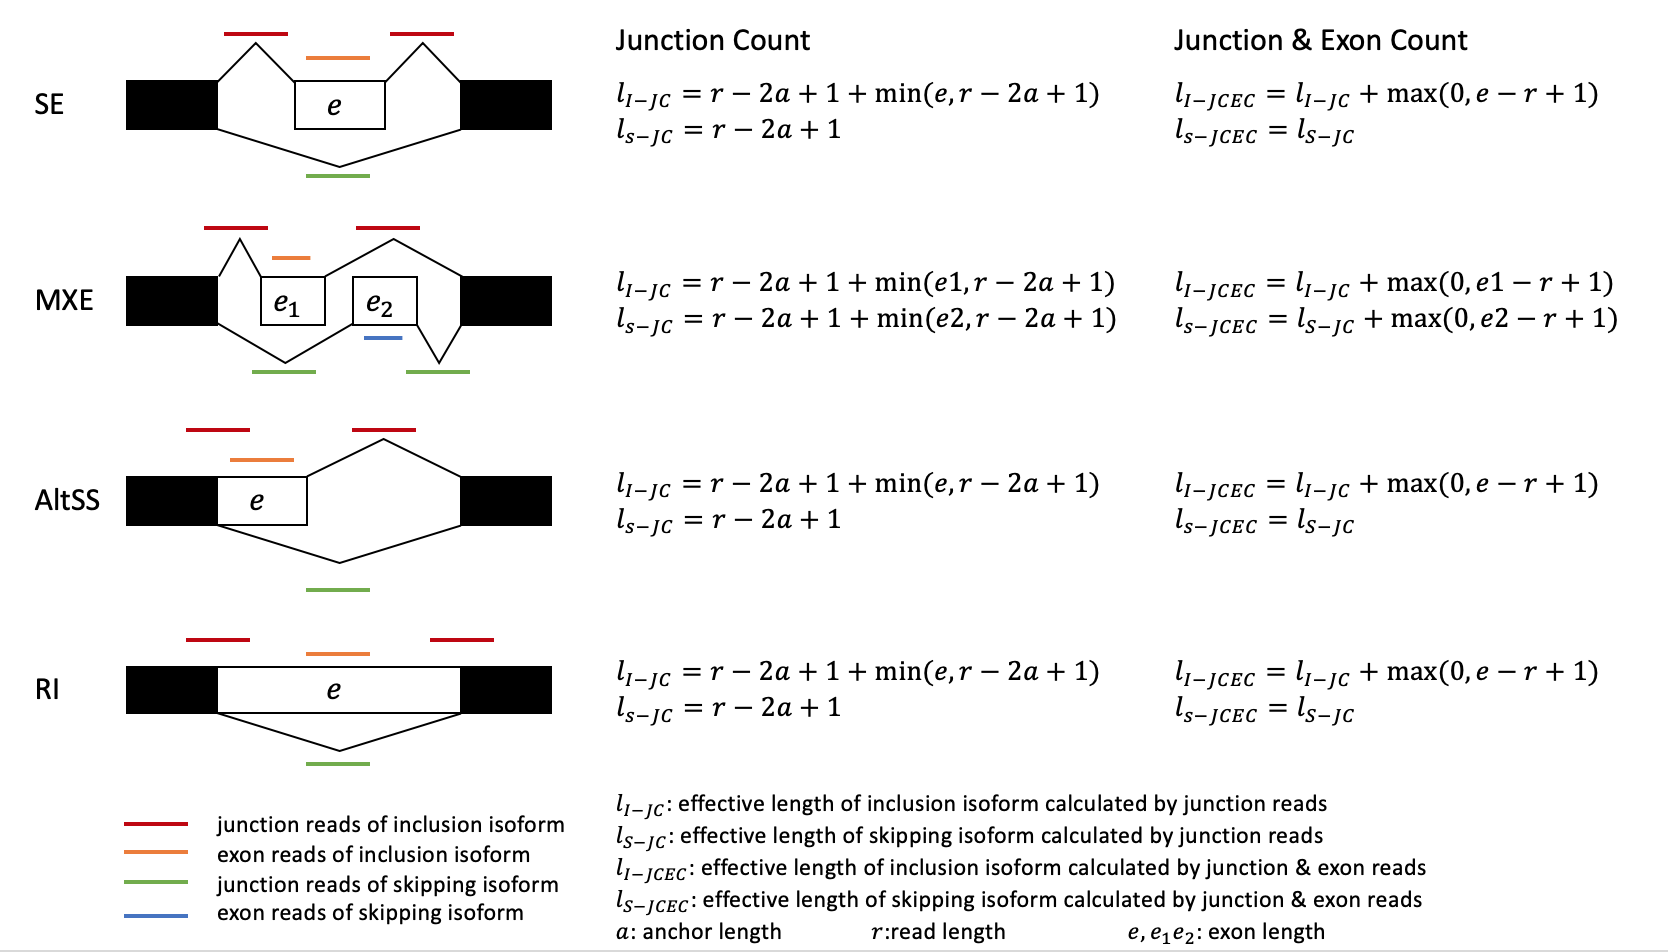


## Changelog
* 1-24-2021: added option to save search results
* 1-25-2021: added Inclusion Level criteria in preprocessing step (2)
* 3-15-2021: Fixed bug in event plotter
* 5-19-2021: Added read count filtering option
